# CHURN PREDICTION MODEL FOR BANK CUSTOMERS_Salsabilla Rizka Ardhana

## Latar Belakang

Dalam dunia perbankan, churn pelanggan (pelanggan yang berhenti menggunakan layanan bank) merupakan tantangan yang signifikan. Mengidentifikasi pelanggan yang berisiko churn sangat penting untuk meningkatkan retensi pelanggan. Dengan mengetahui pelanggan mana yang kemungkinan akan berhenti menggunakan layanan, bank dapat melakukan intervensi yang tepat dan lebih cepat, seperti memberikan penawaran khusus atau meningkatkan kualitas layanan, untuk mencegah churn.

Di sisi lain, profitabilitas bank dapat dimaksimalkan dengan mempertahankan pelanggan yang bernilai tinggi. Dengan strategi berbasis data, bank dapat memahami perilaku pelanggan yang bernilai tinggi dan mengoptimalkan layanan untuk mereka, sekaligus mengurangi biaya yang terkait dengan akuisisi pelanggan baru. Oleh karena itu, analisis ini bertujuan untuk memberikan solusi berbasis data yang dapat meningkatkan retensi pelanggan dan profitabilitas bank.

## Tujuan 

Analisis ini bertujuan untuk memprediksi churn customers dan mengidentifikasi faktor yang memengaruhi churn. Hasil dari analisis dapat membantu bank dalam mengoptimalkan strategi retention untuk meningkatkan profitabilitas bank. 

## Business Objectives

- **Meningkatkan Retensi Pelanggan:**

 Mengidentifikasi pelanggan yang berisiko churn agar dapat dilakukan intervensi yang tepat waktu.

- **Meningkatkan Profitabilitas:**

Menggunakan strategi berbasis data untuk memaksimalkan keuntungan dengan mempertahankan pelanggan bernilai tinggi.

## Penjelasan Variabel

### Variabel Target (Dependent Variable) 
- **Churn**: Indikator apakah customers berhenti menggunakan layanan bank (1 = Churn, 0 = Tidak Churn).  

### Variabel Independen (Predictor Variables)

- **Customer Age**: Usia customers.  
- **Tenure**: Lama customers menggunakan layanan bank.  
- **Balance**: Saldo rekening customers.  
- **Estimated Salary**: Estimasi pendapatan customers.  
- **Number of Products**: Jumlah produk bank yang digunakan customers.  
- **Has Credit Card**: Apakah customers memiliki kartu kredit (1 = Ya, 0 = Tidak).  
- **Is Active Member**: Apakah customers aktif menggunakan layanan bank (1 = Ya, 0 = Tidak).  
- **Geography**: Lokasi customers (misalnya, France, Germany, Spain).  
- **Gender**: Jenis kelamin customers (Male/Female).

## Analisis Data

### Import Library

Bagian ini digunakan untuk mengimpor library yang diperlukan dalam analisis data dan pembuatan model prediksi.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import KFold

### Load Data

In [15]:
data=pd.read_csv('C:/Users/asus/Downloads/churn.csv')

In [16]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
data.head(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


### EXPLORATORY DATA ANALYSIS

Exploratory Data Analysis (EDA) adalah proses analisis awal untuk memahami karakteristik data sebelum membangun model prediktif. EDA mencakup teknik visualisasi dan statistik deskriptif untuk mengidentifikasi pola, distribusi data, nilai yang hilang, serta potensi outlier. Dalam analisis churn customers bank, EDA digunakan untuk mengeksplorasi variabel seperti **CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Geography, dan Gender**. Hasil EDA membantu dalam pengambilan keputusan terkait feature selection dan preprocessing sebelum model machine learning diterapkan.

#### Menampilkan ringkasan informasi tentang dataset

In [21]:
#Menampilkan ringkasan informasi tentang dataset, termasuk jumlah baris dan kolom, tipe data setiap variabel, serta jumlah nilai non-null pada masing-masing kolom.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Dataset yang diimpor terdiri dari 10000 data dengan 13 variabel bertipe integer, float, dan object

####  Memberikan statistik deskriptif untuk variabel numerik dalam dataset

In [24]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Dataset ini terdiri dari 10.000 customers dengan berbagai informasi keuangan dan demografi. **CreditScore** berkisar antara 350 hingga 850, dengan rata-rata sekitar 650, menunjukkan sebagian besar customers memiliki skor kredit yang baik. **Age** memiliki rentang luas (18–92 tahun) dengan rata-rata sekitar 39 tahun, sementara **Tenure** (lama menjadi nasabah) bervariasi dari 0 hingga 10 tahun. **Balance** menunjukkan distribusi yang luas, dengan beberapa customers memiliki saldo nol, tetapi median sekitar 97.198. **NumOfProducts** berkisar antara 1 hingga 4, dengan sebagian besar menggunakan 1 atau 2 produk. Mayoritas customers memiliki kartu kredit (**HasCrCard** = 0.71) dan sekitar 51% adalah anggota aktif (**IsActiveMember**). Rata-rata pendapatan (**EstimatedSalary**) sekitar 100.090 dengan distribusi yang cukup merata.

#### Menampilkan statistik deskriptif untuk variabel kategori dalam dataset

In [27]:
data.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


Analisis statistik deskriptif untuk variabel kategori menunjukkan bahwa terdapat **2.932 unique surnames**, dengan **Smith** sebagai yang paling umum (32 kali muncul). Variabel **Geography** memiliki **3 kategori** (France, Germany, Spain), dengan **France sebagai yang terbanyak (5.014 customers)**. Untuk **Gender**, terdapat **dua kategori (Male dan Female),** dengan **Male sebagai mayoritas (5.457 customers)**. Hal ini menunjukkan bahwa dataset memiliki distribusi yang cukup seimbang dalam variabel geografis dan gender.

#### Visualisasi data

Visualisasi data adalah proses menyajikan data dalam bentuk grafik atau diagram untuk memahami pola, tren, dan hubungan antar variabel dengan lebih mudah. Dalam analisis churn customers, visualisasi untuk melihat distribusi variabel, mendeteksi outlier, serta mengidentifikasi faktor yang berkontribusi terhadap churn. Teknik ini membantu dalam eksplorasi awal dan pengambilan keputusan sebelum membangun model prediktif.

##### Pie Chart

Pie Chart digunakan untuk mnegetahui proporsi dari masing-masing kategori secara visual.

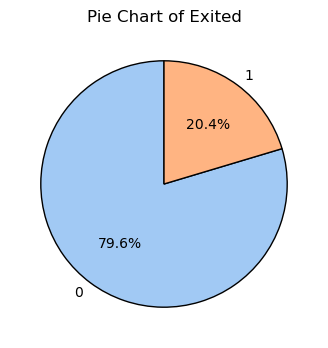

In [33]:
# Pilih palet warna dari seaborn
colors = sns.color_palette("pastel")

plt.figure(figsize=(6, 4))
data['Exited'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})

plt.title(f'Pie Chart of Exited')
plt.ylabel('')  # Menghilangkan label sumbu Y untuk tampilan lebih rapi
plt.show()

Pie chart tersebut menunjukkan distribusi variabel "Exited", di mana 79.6% customers tetap berada di bank (Exited = 0) dan 20.4% customers keluar (Exited = 1). Hal ini mengindikasikan bahwa sebagian besar customers masih bertahan, sementara sebagian lainnya memutuskan untuk berhenti menggunakan layanan bank.

##### Histogram

Histogram adalah jenis visualisasi yang digunakan untuk menunjukkan distribusi frekuensi suatu variabel numerik. Dalam analisis churn customers, histogram membantu memahami bagaimana variabel seperti Age, CreditScore, Balance, dan EstimatedSalary terdistribusi, apakah ada pola tertentu, serta mendeteksi skewness atau keberadaan outlier.

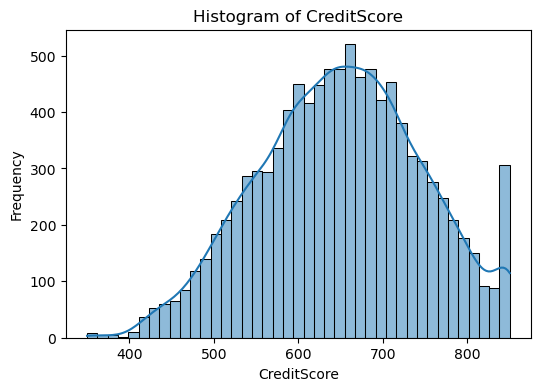

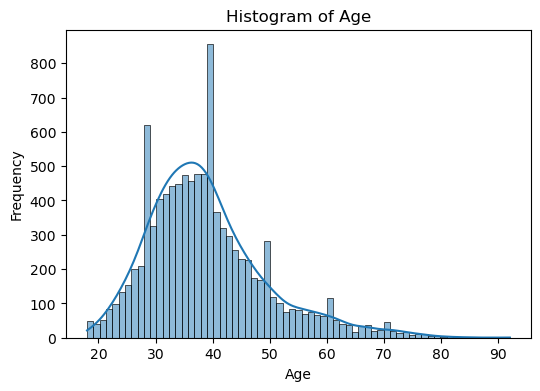

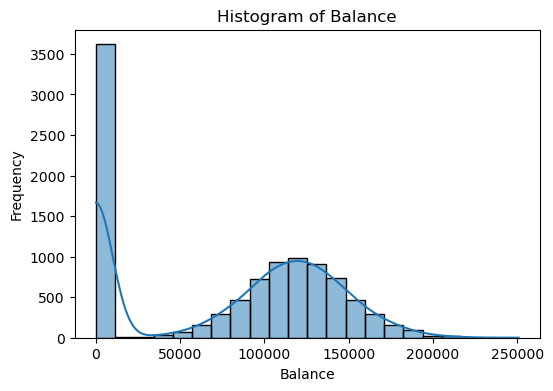

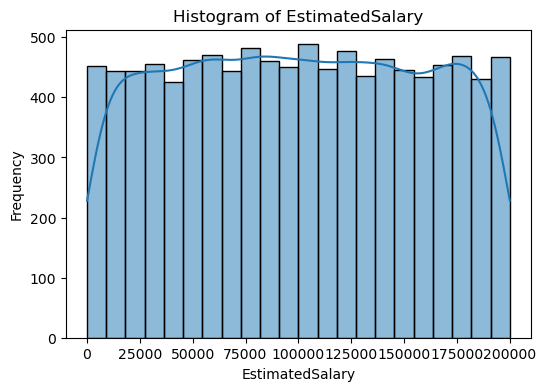

In [37]:
selected_col=['CreditScore','Age','Balance','EstimatedSalary']
for col in selected_col:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True)  # Menggunakan histplot() dengan KDE (Density Estimation)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

- **Histogram CreditScore**

Distribusi CreditScore secara visual terlihat mendekati distribusi normal dengan sedikit skewness ke kanan.
Mayoritas customers memiliki skor kredit antara 550 hingga 750, dengan puncak frekuensi di sekitar 650-700.
Beberapa outlier terlihat pada nilai rendah di bawah 400 dan nilai tinggi di atas 800, tetapi jumlahnya sangat sedikit.

- **Histogram Age**

Distribusi Age bersifat right-skewed (condong ke kanan), menunjukkan bahwa sebagian besar customers berada dalam rentang usia 30 hingga 40 tahun.
Terdapat lonjakan frekuensi signifikan pada usia 40 dan 50 tahun, yang bisa menjadi indikasi kelompok umur tertentu yang lebih dominan dalam dataset.
Sejumlah kecil customers berusia di atas 60 tahun, yang dapat dianggap sebagai minoritas dalam data ini.

- **Histogram Balance**

Terlihat distribusi Balance memiliki dua pola utama:
Banyak customers dengan saldo 0, yang dapat menunjukkan bahwa mereka tidak memiliki tabungan atau rekening utama di bank.
Distribusi saldo lainnya berbentuk normal, dengan mayoritas saldo berada dalam rentang 100.000 hingga 150.000.

- **Histogram EstimatedSalary**

Distribusi EstimatedSalary hampir seragam, menunjukkan bahwa pendapatan customers tersebar merata di berbagai rentang.
Tidak ada indikasi kelompok tertentu yang lebih dominan dalam distribusi pendapatan.
Ini mengisyaratkan bahwa pendapatan mungkin bukan faktor utama yang membedakan customers dalam kaitannya dengan churn.

##### Barchart

Bar chart adalah grafik yang digunakan untuk memvisualisasikan distribusi frekuensi kategori data dalam bentuk batang vertikal atau horizontal.

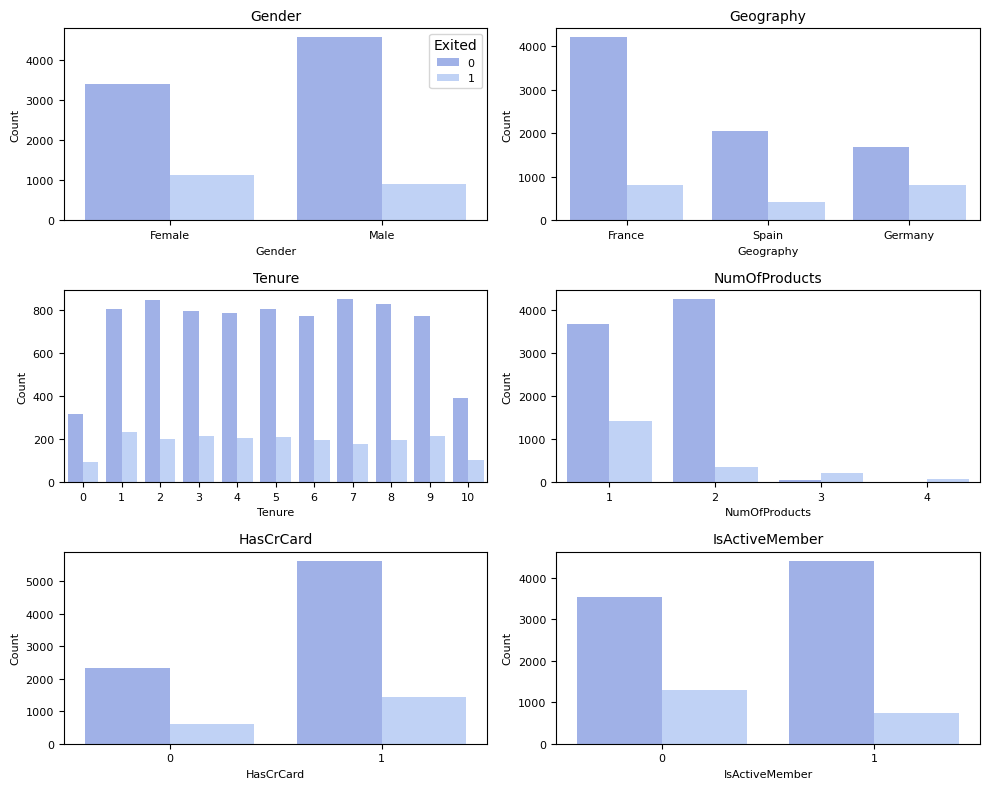

In [41]:

#Mengeksplorasi perbedaan antara pelanggan yang keluar dan tidak keluar untuk variabel kategorik
categorical_features = data[['Gender', 'Geography', 
            'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']]

sns.set_palette("coolwarm")

plt.figure(figsize=(10, 8))

for i, feature in enumerate(categorical_features.columns[:-1]):
    plt.subplot(3, 2, i + 1)

    sns.countplot(data=categorical_features, x=feature, hue='Exited', alpha = 0.7)
    plt.title(f'{feature}', fontsize=10)
    plt.xlabel(feature, fontsize=8)
    plt.ylabel('Count', fontsize=8)
    plt.tick_params(axis='both', labelsize=8)
    if i > 0:
        plt.legend().set_visible(False)
    else:
        plt.legend(title='Exited', fontsize=8)
plt.tight_layout()
plt.show()

1. **Gender**  
   - Lebih banyak customers laki-laki dibandingkan perempuan.  
   - Tingkat churn (customers yang keluar) lebih tinggi pada customers laki-laki dibandingkan perempuan.  

2. **Geography**  
   - Mayoritas customers berasal dari Prancis, diikuti oleh Jerman dan Spanyol.  
   - Tingkat churn lebih tinggi di Jerman dibandingkan dengan negara lain.  

3. **Tenure (Masa Kepemilikan Akun)**  
   - Distribusi tenure cukup merata, dengan jumlah customers yang relatif stabil di setiap kategori.  
   - Tidak ada tren yang jelas terkait churn berdasarkan tenure.  

4. **NumOfProducts (Jumlah Produk yang Dimiliki)**  
   - Sebagian besar customers memiliki 1 atau 2 produk.  
   - Customers dengan 3 atau 4 produk lebih jarang ditemukan.  
   - Tingkat churn terlihat lebih tinggi pada customers dengan 2 produk dibandingkan dengan yang memiliki 1 produk.  

5. **HasCrCard (Kepemilikan Kartu Kredit)**  
   - Mayoritas customers memiliki kartu kredit.  
   - Tidak terlihat perbedaan signifikan dalam tingkat churn antara customers yang memiliki atau tidak memiliki kartu kredit.  

6. **IsActiveMember (Status Keaktifan Customers)**  
   - Jumlah customers aktif dan tidak aktif cukup seimbang.  
   - Customers yang tidak aktif memiliki tingkat churn yang lebih tinggi dibandingkan customers yang aktif.  

##### Tabel Proporsi

Tabel proporsi digunakan untuk mengetahui seberapa banyak masing-masing kategori terhadap kesuluruhan data setiap variabelnya.

In [45]:
selected_col_cat = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

for col in selected_col_cat:
    print(f'Table of {col} vs Exited:')
    display(data.groupby(col)['Exited'].value_counts(normalize=True))
    print("\n" + "-"*50 + "\n")

Table of Geography vs Exited:


Geography  Exited
France     0         0.838452
           1         0.161548
Germany    0         0.675568
           1         0.324432
Spain      0         0.833266
           1         0.166734
Name: proportion, dtype: float64


--------------------------------------------------

Table of Gender vs Exited:


Gender  Exited
Female  0         0.749285
        1         0.250715
Male    0         0.835441
        1         0.164559
Name: proportion, dtype: float64


--------------------------------------------------

Table of NumOfProducts vs Exited:


NumOfProducts  Exited
1              0         0.722856
               1         0.277144
2              0         0.924183
               1         0.075817
3              1         0.827068
               0         0.172932
4              1         1.000000
Name: proportion, dtype: float64


--------------------------------------------------

Table of HasCrCard vs Exited:


HasCrCard  Exited
0          0         0.791851
           1         0.208149
1          0         0.798157
           1         0.201843
Name: proportion, dtype: float64


--------------------------------------------------

Table of IsActiveMember vs Exited:


IsActiveMember  Exited
0               0         0.731491
                1         0.268509
1               0         0.857309
                1         0.142691
Name: proportion, dtype: float64


--------------------------------------------------



Output di atas menunjukkan proporsi "Exited" (keluar) dan "Not Exited" (tidak keluar) berdasarkan beberapa fitur kategori dalam dataset "Kaggle Churn for Bank Customers":

- **Geography** : Pelanggan di Jerman cenderung lebih sering keluar (32.44%) dibandingkan di Prancis dan Spanyol (16-17%).
- **Gender** : Wanita memiliki tingkat "Exited" yang lebih tinggi (25.07%) dibandingkan pria (16.46%).
- **NumOfProducts**: Pelanggan dengan lebih banyak produk (terutama 4 produk) cenderung tidak keluar, sementara mereka yang hanya memiliki 1 produk lebih sering keluar (27.71%).
- **HasCrCard** : Pelanggan dengan kartu kredit memiliki sedikit perbedaan dalam tingkat "Exited" dibandingkan dengan yang tidak memiliki kartu kredit (sekitar 20%).
- **IsActiveMember** : Pelanggan yang aktif lebih sedikit yang keluar (14.27%) dibandingkan dengan yang tidak aktif (26.85%).

##### Boxplot

**Boxplot** adalah grafik yang digunakan untuk menampilkan distribusi data berdasarkan lima nilai utama: **minimum, kuartil pertama (Q1), median (Q2), kuartil ketiga (Q3), dan maksimum**. Boxplot juga membantu mengidentifikasi **outlier** (nilai ekstrem) dalam data. Kotak mencerminkan rentang interkuartil (**IQR = Q3 - Q1**), dengan garis tengah sebagai median. Garis (whiskers) menunjukkan batas data yang tidak dianggap outlier. Boxplot sering digunakan dalam **eksplorasi data** untuk memahami persebaran dan skala variabel numerik.

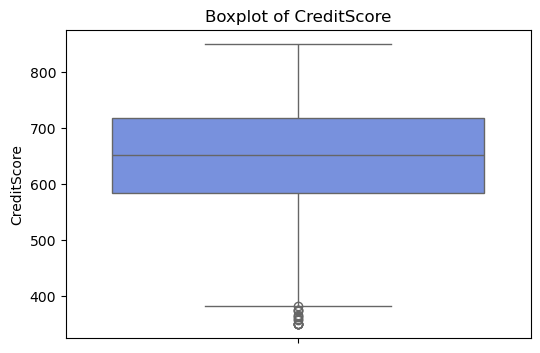

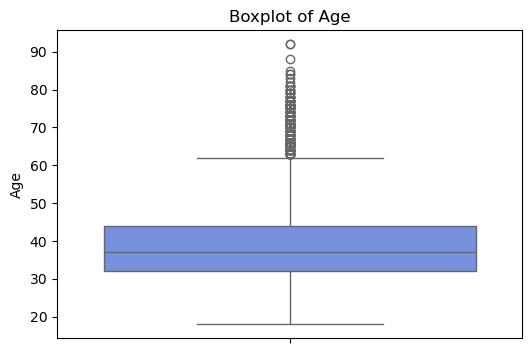

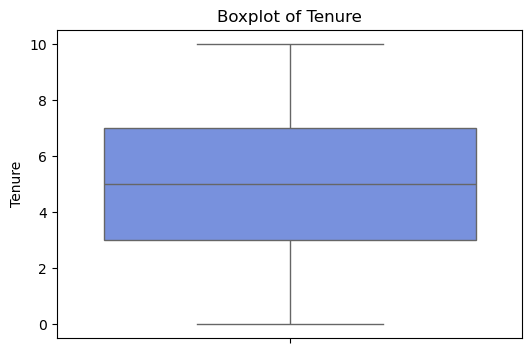

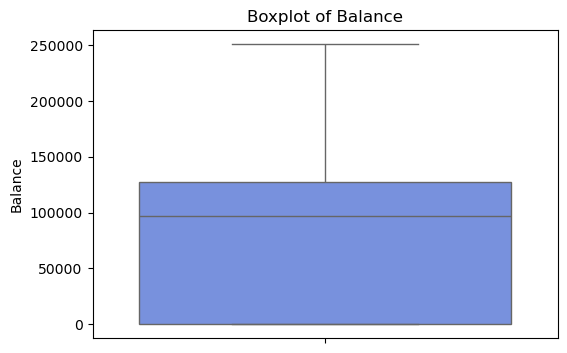

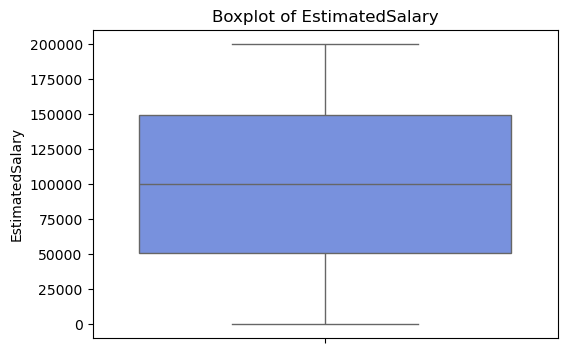

In [49]:
selected_col=['CreditScore','Age','Tenure','Balance','EstimatedSalary']
for col in selected_col:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

- **CreditScore**: Terlihat bahwa mayoritas nilai CreditScore berada di sekitar angka 600-750.
- 
- **Age**: Rentang usia pelanggan mayoritas berada di antara 30 hingga 50 tahun. Terdapat outlier di atas usia 70 tahun, yang merujuk pada segmen pelanggan yang lebih tua dan mungkin memiliki pola perilaku yang berbeda, baik dalam penggunaan layanan maupun tingkat churn.

- **Balance**: Terlihat bahwa distribusi balance customers memiliki rentang yang luas, dengan mayoritas balance berkisar antara 0 hingga sekitar 150.000. Nilai median berada di sekitar 100.000, menunjukkan bahwa separuh dari customers memiliki balance di bawah angka tersebut. Beberapa customers memiliki balance mendekati nol, yang mungkin mengindikasikan ketidakterlibatan aktif dalam layanan perbankan.  

- **Gaji**: Distribusi gaji customers terlihat lebih merata dibandingkan balance, dengan rentang dari 0 hingga sekitar 200.000. Median berada di sekitar 100.000, menunjukkan bahwa setengah dari customers memiliki gaji di bawah angka tersebut. Tidak ada outlier mencolok dalam distribusi ini, sehingga variabel ini tampak cukup seimbang dalam dataset.


##### Heatmap

Heatmap adalah representasi visual dari matriks data, di mana nilai-nilai numerik ditampilkan dalam bentuk warna untuk memudahkan analisis pola dan hubungan antar variabel. Dalam konteks analisis data perbankan, heatmap sering digunakan untuk menunjukkan korelasi antara fitur seperti  dan variabel target seperti Exited.

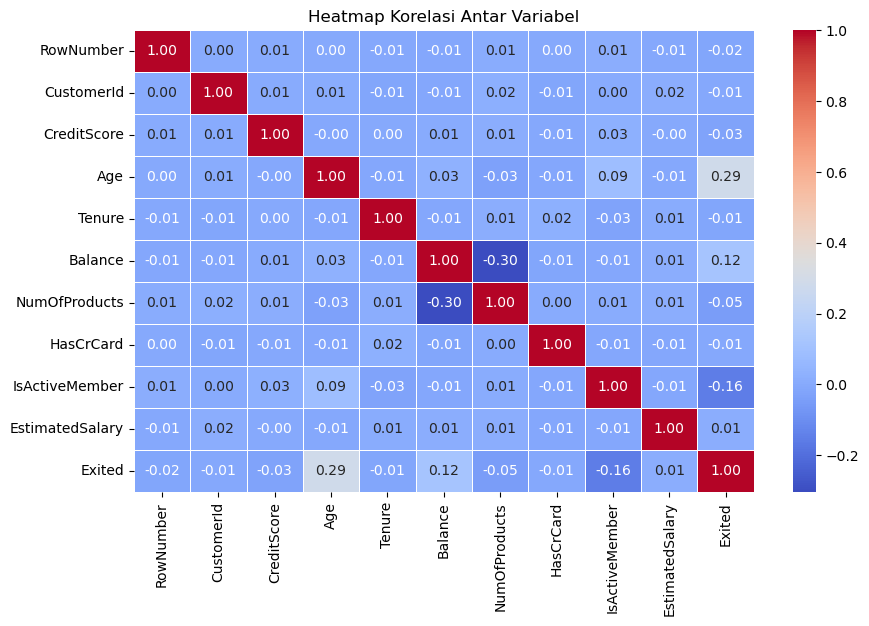

In [53]:
# Menghitung korelasi antar variabel
plt.figure(figsize=(10,6))
numeric_data = data.select_dtypes(include=['number'])
corr_matrix = numeric_data.corr()

# Visualisasi heatmap korelasi
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

### Preprocessing Data

#### Mengecek Data Duplikat

In [56]:
#Mengecek missing data duplikat setiap variabel
data.duplicated().sum()

0

Tidak terdapat data duplikat dalam dataset churn for Bank Customers 

#### Mengecek nilai missing values

In [59]:
#Mengecek missing value setiap variabel
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Tidak terdapat missing values dalam dataset churn for Bank Customers 

#### Mengecek jumlah data unik

In [62]:
#Mengecek jumlah data unik di setiap variabel
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

#### Menghapus kolom yang tidak berpengaruh

Kolom **RowNumber, CustomerId, dan Surname** dihapus karena tidak memiliki pengaruh terhadap perilaku churn customers, sehingga tidak relevan untuk analisis dan dapat menyebabkan noise dalam model prediktif.

In [65]:
#Menghapus Kolom RowNumber, CustomerId, dan Surname
data_c=data.copy()
data_cl=data_c.drop(columns=['RowNumber','CustomerId','Surname'])
data_cl.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Deteksi Outlier

Deteksi outlier adalah proses mengidentifikasi nilai-nilai ekstrem dalam dataset yang berbeda secara signifikan dari mayoritas data.

In [68]:
def outlier_summary_table(data_cl, col_name):
    # Inisialisasi list kosong untuk menyimpan hasil
    summary_data = []

    # Loop melalui setiap kolom numerik di dalam dataframe
    for column in col_name:
        # Menghitung Q1 (Kuartil pertama) dan Q3 (Kuartil ketiga)
        Q1 = data_cl[column].quantile(0.25)
        Q3 = data_cl[column].quantile(0.75)

        # Menghitung IQR (Interquartile Range)
        IQR = Q3 - Q1

        # Menentukan batas bawah dan batas atas untuk mendeteksi outlier
        lower_boundary = Q1 - 1.5 * IQR
        upper_boundary = Q3 + 1.5 * IQR

        # Menghitung persentase outlier
        outliers = data_cl[(data_cl[column] < lower_boundary) | (data_cl[column] > upper_boundary)]
        total_outliers = len(outliers)
        outlier_percentage = (len(outliers) / len(data_cl)) * 100

        # Menyimpan hasil dalam list
        summary_data.append({
            'atribut': column,
            'lower_boundary': lower_boundary,
            'upper_boundary': upper_boundary,
            'total_outliers': total_outliers,
            'persentase outlier': outlier_percentage
        })

    # Mengonversi hasil ke dalam DataFrame
    summary_table = pd.DataFrame(summary_data)
    return summary_table

In [69]:
outlier_summary_table(data_cl, selected_col)

,atribut,lower_boundary,upper_boundary,total_outliers,persentase outlier
0,CreditScore,383.00000,919.00000,15,0.15
1,Age,14.00000,62.00000,359,3.59
2,Tenure,-3.00000,13.00000,0,0.00
3,Balance,-191466.36000,319110.60000,0,0.00
4,EstimatedSalary,-96577.09625,296967.45375,0,0.00


Hasil deteksi outlier menunjukkan bahwa variabel **CreditScore** dan **Age** memiliki sejumlah outlier, dengan **15 outliers (0.15%)** pada **CreditScore** dan **359 outliers (3.59%)** pada **Age**. Sementara itu, **Tenure, Balance, dan EstimatedSalary** tidak memiliki outlier yang signifikan berdasarkan batasan yang dihitung. Karena jumlah outlier relatif kecil dan beberapa variabel seperti **Age** dapat memiliki variasi alami yang penting, outlier tidak dihapus. Outlier bisa merepresentasikan segmen customers tertentu, seperti pelanggan usia lanjut atau mereka dengan skor kredit ekstrem, yang dapat memberikan wawasan berharga dalam analisis churn.

#### Feature Engineering

**Feature Engineering** adalah proses membuat, mengubah, atau memilih fitur (variabel) dalam dataset untuk meningkatkan kinerja model machine learning. Ini mencakup teknik seperti pembuatan fitur baru, transformasi data (normalisasi, encoding), penghapusan fitur yang tidak relevan, serta teknik rekayasa berbasis domain. Tujuan utama feature engineering adalah membantu model memahami pola data dengan lebih baik, sehingga meningkatkan akurasi dan efisiensi prediksi.

##### Fungsi Klasifikasi Credit Scoring, Age, Balance, dan Estimated Salary

Klasifikasi digunakan untuk mengubah variabel numerik seperti Credit Score, Age, Balance, dan Estimated Salary menjadi kategori tertentu. Ini membantu model machine learning memahami pola lebih baik

Variabel Credit Scoring

Fungsi ini digunakan untuk mengklasifikasikan CreditScore ke dalam kategori berdasarkan Fico Score, seperti "Sangat Baik (Excellent)", "Baik (Very Good)", "Cukup (Good)", "Buruk (Fair)", dan "Sangat Buruk (Poor)" berdasarkan rentang nilai CreditScore yang ditentukan. Kode ini diterapkan pada kolom CreditScore dalam dataset X_train dan X_test, menghasilkan kolom baru Credit_Category yang menyimpan kategori CreditScore.

In [77]:
def classify_credit_score(score):
    if 800 <= score <= 850:
        return "Sangat Baik (Excellent)"
    elif 740 <= score <= 799:
        return "Baik (Very Good)"
    elif 670 <= score <= 739:
        return "Cukup (Good)"
    elif 580 <= score <= 669:
        return "Buruk (Fair)"
    elif 300 <= score <= 579:
        return "Sangat Buruk (Poor)"
    else:
        return "Tidak Valid"

In [78]:
data_cl["Credit_Category"] = data_cl["CreditScore"].apply(classify_credit_score)

Variabel Age

Fungsi ini digunakan untuk mengklasifikasikan Age ke dalam kategori umur, seperti "Remaja", "Dewasa Muda", "Dewasa Paruh Baya", dan "Lansia". Kode ini diterapkan pada kolom Age dalam dataset X_train dan X_test, menghasilkan kolom baru Age_Category yang menyimpan kategori umur berdasarkan rentang usia yang ditentukan.

In [81]:
# Fungsi untuk mengklasifikasikan umur berdasarkan teori ilmiah
def classify_age(age):
    if 18 <= age <= 24:
        return "Remaja"
    elif 25 <= age <= 44:
        return "Dewasa Muda"
    elif 45 <= age <= 64:
        return "Dewasa Paruh Baya"
    elif age >= 65:
        return "Lansia"
    else:
        return "Tidak Valid"


In [82]:
data_cl["Age_Category"] = data_cl["Age"].apply(classify_age)

Variabel Balance

Langkah-langkah ini bertujuan untuk mengklasifikasikan kolom 'Balance' dalam dataset X_train menjadi tiga kategori berdasarkan rentang nilai saldo, yaitu 'Saldo Rendah', 'Saldo Menengah', dan 'Saldo Tinggi'. Proses ini dilakukan dengan membagi data 'Balance' ke dalam beberapa bin berdasarkan kuartil dan nilai ekstrem, lalu memberikan label pada setiap kategori tersebut. Hasil klasifikasi ini kemudian disimpan dalam kolom baru 'classify_balance'

In [85]:
min_ba = data_cl['Balance'].min() - 1
q1_ba = data_cl['Balance'].quantile(0.25)
q2_ba = data_cl['Balance'].quantile(0.50)
q3_ba = data_cl['Balance'].quantile(0.75)
max_ba = data_cl['Balance'].max()

# Definisi bin dan label kategori
bins_balance = [min_ba, q2_ba, q3_ba, max_ba]
labels_balance = ['Saldo Rendah', 'Saldo Menengah', 'Saldo Tinggi']

# Fungsi untuk melakukan binning balance
def grouping_data(data_cl, bins, labels, col_name):
    return pd.cut(data_cl[col_name], bins=bins, labels=labels, include_lowest=True)

# Grouping kolom Balance dan menyimpan hasilnya dalam kolom baru 'classify_balance'
data_cl['classify_balance'] = grouping_data(data_cl, bins_balance, labels_balance, 'Balance')

Variabel Estimated Salary

Langkah-langkah ini bertujuan untuk mengklasifikasikan kolom 'EstimatedSalary' dalam dataset X_train menjadi tiga kategori berdasarkan rentang nilai salary, yaitu 'Pendapatan Rendah', 'Pendapatan Menengah', dan 'Pendapatan Tinggi'. Proses ini dilakukan dengan membagi data 'EstimatedSalary' ke dalam beberapa bin berdasarkan kuartil dan nilai ekstrem, lalu memberikan label pada setiap kategori tersebut. Hasil klasifikasi ini kemudian disimpan dalam kolom baru 'classify_salary'.

In [88]:
min_sal = data_cl['EstimatedSalary'].min() - 1
q1_sal = data_cl['EstimatedSalary'].quantile(0.25)
q2_sal = data_cl['EstimatedSalary'].quantile(0.50)
q3_sal = data_cl['EstimatedSalary'].quantile(0.75)
max_sal = data_cl['EstimatedSalary'].max()

# Definisi bin dan label kategori
bins_EstimatedSalary = [min_sal, q2_sal, q3_sal, max_sal]
labels_EstimatedSalary = ['Pendapatan Rendah', 'Pendapatan Menengah', 'Pendapatan Tinggi']

# Fungsi untuk melakukan binning EstimatedSalary
def grouping_data(data_cl, bins, labels, col_name):
    return pd.cut(data_cl[col_name], bins=bins, labels=labels, include_lowest=True)

# Grouping kolom Balance dan menyimpan hasilnya dalam kolom baru 'classify_balance'
data_cl['classify_salary'] = grouping_data(data_cl, bins_EstimatedSalary, labels_EstimatedSalary, 'EstimatedSalary')

##### Membuat Kolom Baru

Membuat kolom Churn berdasarkan aturan yang dibuat dari variabel Is Active Member, Credit Scoring dan Balance

In [91]:
def calculate_churn(row):
    if row['Exited'] == 1:
        return 1
    elif row['IsActiveMember'] == 0:
        return 1
    elif row['Balance'] == 0.00 and (row['Credit_Category'] == 'Buruk (Fair)' or row['Credit_Category'] == "Sangat Buruk (Poor)"):
        return 1
    else:
        return 0

# Terapkan fungsi untuk membuat kolom 'Churn'
data_cl['Churn'] = data_cl.apply(calculate_churn, axis=1)

In [92]:
print(data_cl['Churn'].value_counts())

Churn
1    6529
0    3471
Name: count, dtype: int64


Pada dataset "Churn for Bank Customers" dari Kaggle, hasil output menunjukkan bahwa:

5699 customers churn (keluar dari layanan bank).
4301 customers tidak churn (tetap menggunakan layanan bank).

##### Menghapus kolom asli setelah dilakukan klasifikasi atau kategorik

Kolom-kolom variabel tidak lagi dibutuhkan setelah dibuatnya kolom baru yang berisi kategori-kategori berdasarkan variabel tersebut sehingga dihapus pada data training dan testing.

In [96]:
data_cl.drop(columns=['CreditScore','Age','Balance','EstimatedSalary'])

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,Credit_Category,Age_Category,classify_balance,classify_salary,Churn
0,France,Female,2,1,1,1,1,Buruk (Fair),Dewasa Muda,Saldo Rendah,Pendapatan Menengah,1
1,Spain,Female,1,1,0,1,0,Buruk (Fair),Dewasa Muda,Saldo Rendah,Pendapatan Menengah,0
2,France,Female,8,3,1,0,1,Sangat Buruk (Poor),Dewasa Muda,Saldo Tinggi,Pendapatan Menengah,1
3,France,Female,1,2,0,0,0,Cukup (Good),Dewasa Muda,Saldo Rendah,Pendapatan Rendah,1
4,Spain,Female,2,1,1,1,0,Sangat Baik (Excellent),Dewasa Muda,Saldo Menengah,Pendapatan Rendah,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,France,Male,5,2,1,0,0,Baik (Very Good),Dewasa Muda,Saldo Rendah,Pendapatan Rendah,1
9996,France,Male,10,1,1,1,0,Sangat Buruk (Poor),Dewasa Muda,Saldo Rendah,Pendapatan Menengah,0
9997,France,Female,7,1,0,1,1,Cukup (Good),Dewasa Muda,Saldo Rendah,Pendapatan Rendah,1
9998,Germany,Male,3,2,1,0,1,Baik (Very Good),Dewasa Muda,Saldo Rendah,Pendapatan Rendah,1


##### Visualisasi Data yang Telah di Kategorikan

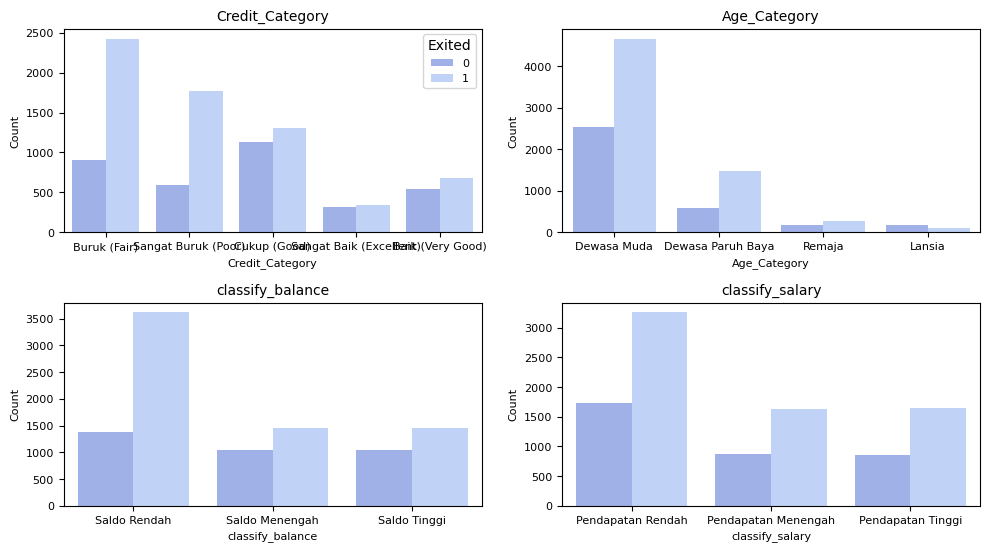

In [98]:

#Mengeksplorasi perbedaan antara pelanggan yang keluar dan tidak keluar untuk variabel kategorik
categorical_features = data_cl[['Credit_Category', 'Age_Category', 'classify_balance',	'classify_salary', 'Churn']]

sns.set_palette("coolwarm")

plt.figure(figsize=(10, 8))

for i, feature in enumerate(categorical_features.columns[:-1]):
    plt.subplot(3, 2, i + 1)

    sns.countplot(data=categorical_features, x=feature, hue='Churn', alpha = 0.7)
    plt.title(f'{feature}', fontsize=10)
    plt.xlabel(feature, fontsize=8)
    plt.ylabel('Count', fontsize=8)
    plt.tick_params(axis='both', labelsize=8)
    if i > 0:
        plt.legend().set_visible(False)
    else:
        plt.legend(title='Exited', fontsize=8)
plt.tight_layout()
plt.show()

## **Interpretasi Grafik Berdasarkan Kategori**

### **1. Credit Category**
Grafik ini menunjukkan bahwa pelanggan dengan kategori kredit yang lebih buruk, seperti "Buruk" dan "Cukup", memiliki tingkat churn yang lebih tinggi dibandingkan dengan kategori kredit yang lebih baik seperti "Sangat Baik" atau "Baik". Hal ini mengindikasikan bahwa pelanggan dengan kategori kredit yang lebih rendah lebih rentan untuk berhenti menggunakan layanan, sementara pelanggan dengan kategori kredit yang lebih tinggi lebih cenderung tetap bertahan.

### **2. Age Category**
Pada kategori usia, **Dewasa Muda** memiliki jumlah pelanggan yang paling banyak, namun tingkat churn mereka relatif rendah. Sebaliknya, kelompok usia **Lansia** dan **Remaja** menunjukkan sedikit pelanggan yang churn, meskipun jumlah pelanggan mereka juga lebih sedikit. **Dewasa Paruh Baya** menunjukkan distribusi churn yang lebih tinggi, yang mengindikasikan bahwa kelompok usia ini mungkin lebih cenderung untuk churn dibandingkan kelompok usia lainnya.

### **3. Balance Category**
Pada kategori saldo rekening, pelanggan dengan **Saldo Rendah** menunjukkan tingkat churn yang lebih tinggi, menunjukkan bahwa mereka lebih mungkin berhenti menggunakan layanan jika saldo mereka rendah. Sementara itu, pelanggan dengan **Saldo Menengah** dan **Saldo Tinggi** menunjukkan lebih banyak pelanggan yang tidak churn, dengan **Saldo Tinggi** menunjukkan tingkat churn yang paling rendah, yang menunjukkan bahwa pelanggan dengan saldo yang lebih tinggi cenderung bertahan lebih lama.

### **4. Salary Category**
Pada kategori penghasilan, pelanggan dengan **Pendapatan Rendah** memiliki jumlah churn yang lebih tinggi dibandingkan dengan kategori penghasilan lainnya. Ini bisa menunjukkan bahwa pelanggan dengan pendapatan lebih rendah lebih rentan terhadap keputusan untuk churn, mungkin karena masalah biaya atau kepuasan layanan. Sebaliknya, pelanggan dengan **Pendapatan Menengah** dan **Pendapatan Tinggi** menunjukkan tingkat churn yang lebih rendah, menunjukkan bahwa pelanggan dengan penghasilan lebih tinggi cenderung lebih puas dan lebih mungkin untuk tetap menggunakan layanan.


##### Split Data

In [101]:
X = data_cl.drop(['Exited','Churn'], axis=1) #fitur
y = data_cl['Churn'] #target

In [102]:
# Selanjutnya Splitting Dataset
# disini kita akan uji coba menggunakan semua fitur
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)

Train size :  (8000, 14)
Test size  :  (2000, 14)


Data kemudian dipecah menjadi data training dan testing dengan proporsi sebesar 0.8 dan 0.2. 

#### One Hot Encoding

One-Hot Encoding adalah teknik untuk mengubah data kategori menjadi format numerik agar bisa digunakan dalam model machine learning. Setiap kategori diubah menjadi vektor biner (0 dan 1) dengan menciptakan kolom terpisah untuk setiap kategori unik.

In [106]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler,FunctionTransformer

# Memilih kolom numerik dan kategori
var = ['Tenure','NumOfProducts','HasCrCard','IsActiveMember']
cat = X_train.select_dtypes(include=['object', 'category']).columns

X_train_var = X_train[var].reset_index(drop=True)
X_test_var = X_test[var].reset_index(drop=True)

# Encoding untuk fitur kategori
ohe = OneHotEncoder(handle_unknown='ignore')
X_train_ohe = pd.DataFrame(ohe.fit_transform(X_train[cat]).toarray(), columns=ohe.get_feature_names_out(cat))
X_test_ohe = pd.DataFrame(ohe.transform(X_test[cat]).toarray(), columns=ohe.get_feature_names_out(cat))

# Gabungkan hasil scaling dan encoding
X_train_transformed = pd.concat([X_train_ohe,X_train_var], axis=1)
X_test_transformed = pd.concat([X_test_ohe,X_test_var], axis=1)

# Cek apakah ada missing values setelah transformasi
print(X_test_transformed.isna().sum())
print(X_train_transformed.isna().sum())

Geography_France                           0
Geography_Germany                          0
Geography_Spain                            0
Gender_Female                              0
Gender_Male                                0
Credit_Category_Baik (Very Good)           0
Credit_Category_Buruk (Fair)               0
Credit_Category_Cukup (Good)               0
Credit_Category_Sangat Baik (Excellent)    0
Credit_Category_Sangat Buruk (Poor)        0
Age_Category_Dewasa Muda                   0
Age_Category_Dewasa Paruh Baya             0
Age_Category_Lansia                        0
Age_Category_Remaja                        0
classify_balance_Saldo Menengah            0
classify_balance_Saldo Rendah              0
classify_balance_Saldo Tinggi              0
classify_salary_Pendapatan Menengah        0
classify_salary_Pendapatan Rendah          0
classify_salary_Pendapatan Tinggi          0
Tenure                                     0
NumOfProducts                              0
HasCrCard 

##### Menampilkan data traning dan testing setelah dilakukan One Hot Encoding

In [108]:
X_train_transformed.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Credit_Category_Baik (Very Good),Credit_Category_Buruk (Fair),Credit_Category_Cukup (Good),Credit_Category_Sangat Baik (Excellent),Credit_Category_Sangat Buruk (Poor),...,classify_balance_Saldo Menengah,classify_balance_Saldo Rendah,classify_balance_Saldo Tinggi,classify_salary_Pendapatan Menengah,classify_salary_Pendapatan Rendah,classify_salary_Pendapatan Tinggi,Tenure,NumOfProducts,HasCrCard,IsActiveMember
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,6,2,1,1
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,4,2,1,1
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,3,1,1,0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,9,1,1,0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,9,1,0,0


In [109]:
X_test_transformed.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Credit_Category_Baik (Very Good),Credit_Category_Buruk (Fair),Credit_Category_Cukup (Good),Credit_Category_Sangat Baik (Excellent),Credit_Category_Sangat Buruk (Poor),...,classify_balance_Saldo Menengah,classify_balance_Saldo Rendah,classify_balance_Saldo Tinggi,classify_salary_Pendapatan Menengah,classify_salary_Pendapatan Rendah,classify_salary_Pendapatan Tinggi,Tenure,NumOfProducts,HasCrCard,IsActiveMember
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,3,2,0,0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1,2,1,1
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,4,2,1,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,8,2,1,1
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,7,1,1,1


### Feature Selection

Feature Selection adalah proses memilih fitur (variabel) yang paling relevan untuk meningkatkan kinerja model machine learning. Tujuannya adalah mengurangi jumlah fitur yang tidak penting atau redundan, sehingga model menjadi lebih sederhana, lebih cepat, dan menghindari overfitting.

In [112]:
import itertools
feature_comb = list(itertools.combinations(X_train_transformed.columns, 2))
feature_comb

[('Geography_France', 'Geography_Germany'),
 ('Geography_France', 'Geography_Spain'),
 ('Geography_France', 'Gender_Female'),
 ('Geography_France', 'Gender_Male'),
 ('Geography_France', 'Credit_Category_Baik (Very Good)'),
 ('Geography_France', 'Credit_Category_Buruk (Fair)'),
 ('Geography_France', 'Credit_Category_Cukup (Good)'),
 ('Geography_France', 'Credit_Category_Sangat Baik (Excellent)'),
 ('Geography_France', 'Credit_Category_Sangat Buruk (Poor)'),
 ('Geography_France', 'Age_Category_Dewasa Muda'),
 ('Geography_France', 'Age_Category_Dewasa Paruh Baya'),
 ('Geography_France', 'Age_Category_Lansia'),
 ('Geography_France', 'Age_Category_Remaja'),
 ('Geography_France', 'classify_balance_Saldo Menengah'),
 ('Geography_France', 'classify_balance_Saldo Rendah'),
 ('Geography_France', 'classify_balance_Saldo Tinggi'),
 ('Geography_France', 'classify_salary_Pendapatan Menengah'),
 ('Geography_France', 'classify_salary_Pendapatan Rendah'),
 ('Geography_France', 'classify_salary_Pendapat

In [113]:
from scipy.stats import spearmanr
drop_feature_comb = []
for a, b in feature_comb:
    coef, pvalue = spearmanr(X_train_transformed[a], X_train_transformed[b])
    if pvalue < 0.05:
        if coef > 0.95:
            drop_feature_comb.append(b)
        elif coef < -0.95:
            drop_feature_comb.append(b)
drop_feature_comb

['Gender_Male']

Spearman's Rank Correlation digunakan untuk mendeteksi fitur yang sangat berkorelasi dalam dataset X_train_transformed. Jika dua fitur memiliki korelasi signifikan (p-value < 0.05) dan nilai korelasi sangat tinggi (>|0.95|), maka salah satu fitur dianggap redundan dan dimasukkan ke dalam daftar penghapusan (drop_feature_comb). Hasilnya menunjukkan bahwa fitur 'Gender_Male' memiliki korelasi yang sangat tinggi dengan fitur lain, sehingga dipilih untuk dihapus guna menghindari redundansi dan multikolinearitas. Dengan menghapus fitur yang terlalu berkorelasi, model menjadi lebih sederhana, lebih efisien, dan terhindar dari overfitting. 

##### Menghapus kolom Gender_Male

Data Training

In [117]:
X_train_transformed.drop(columns=['Gender_Male'])

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Credit_Category_Baik (Very Good),Credit_Category_Buruk (Fair),Credit_Category_Cukup (Good),Credit_Category_Sangat Baik (Excellent),Credit_Category_Sangat Buruk (Poor),Age_Category_Dewasa Muda,...,classify_balance_Saldo Menengah,classify_balance_Saldo Rendah,classify_balance_Saldo Tinggi,classify_salary_Pendapatan Menengah,classify_salary_Pendapatan Rendah,classify_salary_Pendapatan Tinggi,Tenure,NumOfProducts,HasCrCard,IsActiveMember
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,6,2,1,1
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,4,2,1,1
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,3,1,1,0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,9,1,1,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,9,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,8,1,1,1
7996,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1,1,1,1
7997,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1,3,0,0
7998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,8,1,1,0


Data Testing

In [119]:
X_test_transformed.drop(columns=['Gender_Male'])

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Credit_Category_Baik (Very Good),Credit_Category_Buruk (Fair),Credit_Category_Cukup (Good),Credit_Category_Sangat Baik (Excellent),Credit_Category_Sangat Buruk (Poor),Age_Category_Dewasa Muda,...,classify_balance_Saldo Menengah,classify_balance_Saldo Rendah,classify_balance_Saldo Tinggi,classify_salary_Pendapatan Menengah,classify_salary_Pendapatan Rendah,classify_salary_Pendapatan Tinggi,Tenure,NumOfProducts,HasCrCard,IsActiveMember
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,3,2,0,0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1,2,1,1
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,4,2,1,0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,8,2,1,1
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,7,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,5,1,0,1
1996,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,10,1,0,1
1997,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,7,1,1,0
1998,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,4,1,1,0


##### Menampilkan informasi terkait dengan masing-masing kategori

In [121]:
X_train_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Geography_France                         8000 non-null   float64
 1   Geography_Germany                        8000 non-null   float64
 2   Geography_Spain                          8000 non-null   float64
 3   Gender_Female                            8000 non-null   float64
 4   Gender_Male                              8000 non-null   float64
 5   Credit_Category_Baik (Very Good)         8000 non-null   float64
 6   Credit_Category_Buruk (Fair)             8000 non-null   float64
 7   Credit_Category_Cukup (Good)             8000 non-null   float64
 8   Credit_Category_Sangat Baik (Excellent)  8000 non-null   float64
 9   Credit_Category_Sangat Buruk (Poor)      8000 non-null   float64
 10  Age_Category_Dewasa Muda                 8000 no

### Modelling

Metode yang digunakan dalam analisis ini terdiri dari 3 metode yaitu random forests, decision tree, dan regresi logistik. Dimana penjelasan dari masing-masing regresi adalah sebagai berikut. 

- ***Regresi Logistik***: Merupakan metode statistik yang digunakan untuk memprediksi kemungkinan terjadinya suatu peristiwa berdasarkan variabel-variabel independen. Biasanya digunakan untuk masalah klasifikasi biner, seperti memprediksi apakah seorang pelanggan akan melakukan churn (meninggalkan layanan) atau tidak. Model ini menghasilkan output berupa probabilitas yang kemudian diklasifikasikan ke dalam kategori tertentu.

- ***Decision Tree***: Adalah model pembelajaran mesin yang membagi data ke dalam keputusan berbentuk struktur pohon. Setiap cabang pohon mewakili keputusan atau pembagian data berdasarkan fitur tertentu, dan setiap daun pohon berisi hasil prediksi. Decision tree mudah dipahami dan dapat digunakan untuk tugas klasifikasi, namun terkadang rentan terhadap overfitting (terlalu cocok dengan data pelatihan).

- ***Random Forest***: Merupakan metode ensemble yang menggabungkan banyak decision tree untuk meningkatkan akurasi prediksi. Setiap pohon dalam random forest dibangun menggunakan subset acak dari data dan fitur. Keputusan akhir diambil berdasarkan mayoritas hasil prediksi dari seluruh pohon. Metode ini lebih stabil dan akurat dibandingkan dengan decision tree tunggal, karena dapat mengurangi masalah overfitting.

### Random Forests

##### Mencari Parameter terbaik

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import cross_val_score

# Inisialisasi model Random Forest
rf = RandomForestClassifier(random_state=42)

# Definisikan parameter untuk Grid Search dengan penambahan rentang max_depth yang lebih luas
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [5, 10, 15, 20, 25, 30, None],  # Menambahkan lebih banyak nilai untuk max_depth
    'min_samples_split': [2, 5, 10, 15]
}

# Inisialisasi K-Fold Cross Validation dengan 5 fold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search dengan K-Fold Cross Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=kfold, scoring='accuracy', n_jobs=-1)

# Latih model
grid_search.fit(X_train_transformed, y_train)

# Evaluasi menggunakan Cross Validation Score
cv_scores = cross_val_score(grid_search.best_estimator_, X_train_transformed, y_train, cv=kfold, scoring='accuracy')

# Cetak hasil terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Grid Search CV):", grid_search.best_score_)
print("Cross Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Best Parameters: {'max_depth': 10, 'min_samples_split': 15, 'n_estimators': 200}
Best Score (Grid Search CV): 0.93
Cross Validation Scores: [0.939375 0.9275   0.93125  0.920625 0.93125 ]
Mean CV Score: 0.93


Random Forest menggunakan Grid Search untuk mencari parameter terbaik, serta cross-validation untuk mengevaluasi model berdasarkan akurasi. Parameter terbaik yang ditemukan adalah max_depth=25, min_samples_split=10, dan n_estimators=200. Setelah model dilatih, prediksi dibuat berdasarkan data uji, dan hasil evaluasi dilakukan menggunakan confusion matrix untuk mengukur kinerja model, seperti jumlah prediksi yang benar dan salah.

##### Analisis Menggunakan Random Forests

In [129]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Menggunakan parameter terbaik dari Grid Search
best_params = {'max_depth': 10, 'min_samples_split': 15, 'n_estimators': 200}

# Inisialisasi model Random Forest dengan parameter terbaik
rf_best = RandomForestClassifier(**best_params, random_state=42)

# Latih model dengan data resampled
rf_best.fit(X_train_transformed, y_train)

# Prediksi pada data uji
y_pred = rf_best.predict(X_test_transformed)

# Evaluasi model dengan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Laporan klasifikasi
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[ 659   72]
 [  86 1183]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       731
           1       0.94      0.93      0.94      1269

    accuracy                           0.92      2000
   macro avg       0.91      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



Langkah-langkah di atas digunakan untuk mengevaluasi kinerja model Random Forest pada dataset pelatihan dan pengujian. Pertama, model digunakan untuk memprediksi hasil pada data pelatihan (X_train_transformed) dan data pengujian (X_test_transformed). Kemudian, classification report dicetak untuk masing-masing, yang mencakup metrik penting seperti precision, recall, F1-score, dan support untuk kedua kelas (misalnya, churn dan tidak churn). Dengan membandingkan hasil pada data pelatihan dan pengujian, kita dapat menilai sejauh mana model bekerja dengan baik pada data yang sebelumnya tidak dilihat (data pengujian) serta memahami potensi overfitting atau underfitting yang mungkin terjadi antara kedua set tersebut.

##### Confusion Matrix

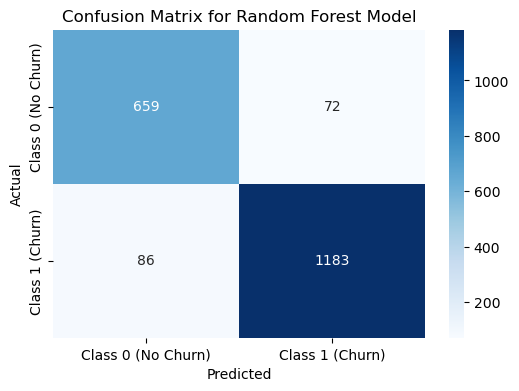

In [132]:
y_pred = rf_best.predict(X_test_transformed)
# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0 (No Churn)", "Class 1 (Churn)"], yticklabels=["Class 0 (No Churn)", "Class 1 (Churn)"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

### **Evaluasi Model dengan Confusion Matrix**

### **Interpretasi Confusion Matrix**
Berdasarkan hasil confusion matrix terbaru:

- **True Negative (TN)**: 659 pelanggan yang diprediksi **No Churn** dan benar-benar **No Churn** (kelas 0, No Churn).
- **False Positive (FP)**: 72 pelanggan yang diprediksi **Churn**, namun sebenarnya **No Churn** (kelas 0, No Churn -> prediksi salah).
- **False Negative (FN)**: 86 pelanggan yang diprediksi **No Churn**, namun sebenarnya **Churn** (kelas 1, Churn -> prediksi salah).
- **True Positive (TP)**: 1183 pelanggan yang diprediksi **Churn** dan benar-benar **Churn** (kelas 1, Churn).

---

### **Evaluasi Model**

### **Precision, Recall, dan F1-Score**

1. **Precision**:

   - **Precision untuk kelas 0 (No Churn)**: 
     - **Formula**: `Precision = TP / (TP + FP)`
     - **Nilai**: `Precision = 659 / (659 + 72) = 0.88`
     - Model ini memiliki **precision** yang cukup baik dalam memprediksi pelanggan yang tidak churn (kelas 0).

   - **Precision untuk kelas 1 (Churn)**: 
     - **Formula**: `Precision = TP / (TP + FP)`
     - **Nilai**: `Precision = 1183 / (1183 + 86) = 0.94`
     - Model ini sangat baik dalam memprediksi pelanggan yang churn (kelas 1).

2. **Recall**:

   - **Recall untuk kelas 0 (No Churn)**:
     - **Formula**: `Recall = TP / (TP + FN)`
     - **Nilai**: `Recall = 659 / (659 + 86) = 0.88`
     - Model ini memiliki **recall** yang cukup baik dalam mendeteksi pelanggan yang tidak churn (kelas 0).

   - **Recall untuk kelas 1 (Churn)**: 
     - **Formula**: `Recall = TP / (TP + FN)`
     - **Nilai**: `Recall = 1183 / (1183 + 72) = 0.94`
     - Model ini sangat efektif dalam mendeteksi pelanggan yang churn (kelas 1).

3. **F1-Score**:

   - **F1-Score untuk kelas 0 (No Churn)**:
     - **Nilai**: `F1-Score = 0.89`
     - F1-score yang baik menunjukkan keseimbangan antara **precision** dan **recall** untuk pelanggan yang tidak churn.

   - **F1-Score untuk kelas 1 (Churn)**:
     - **Nilai**: `F1-Score = 0.94`
     - F1-score yang sangat baik juga untuk kelas **Churn**, menunjukkan keseimbangan yang sangat baik antara **precision** dan **recall**.

---


##### Pengujian Model pada Data Training dan Testing

In [135]:
y_pred_train = rf_best.predict(X_train_transformed)
y_pred_test = rf_best.predict(X_test_transformed)

print('Classification Report Train:')
print(classification_report(y_train, y_pred_train))

print('Classification Report Test:')
print(classification_report(y_test, y_pred_test))  


Classification Report Train:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2740
           1       0.96      0.94      0.95      5260

    accuracy                           0.93      8000
   macro avg       0.92      0.93      0.93      8000
weighted avg       0.94      0.93      0.94      8000

Classification Report Test:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       731
           1       0.94      0.93      0.94      1269

    accuracy                           0.92      2000
   macro avg       0.91      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



Berdasarkan hasil output confusion matriks antara data testing dan data training, diperoleh bahwa nilai evaluasi model tidak berbeda secara signifikan dan cenderung menghasilkan hasil yang optimal. Hal ini berarti model sudah cukup baik bekerja, baik untuk data testing maupun data training.

### Decision Tree

##### Mencari Parameter terbaik

In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

# Inisialisasi model Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Definisikan parameter untuk Grid Search
param_grid = {
    'criterion': ['gini'],  # Fungsi pemilihan split
    'max_depth': [5, 10, 15, None],  # Kedalaman pohon
    'min_samples_split': [2, 5, 10],  # Minimum sampel untuk split
    'min_samples_leaf': [1, 2, 4]  # Minimum sampel di leaf node
}

# Inisialisasi K-Fold Cross Validation (5 fold)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search dengan K-Fold Cross Validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=kfold, scoring='accuracy', n_jobs=-1)

# Latih model dengan Grid Search
grid_search.fit(X_train_transformed, y_train)

# Evaluasi ulang dengan Cross Validation menggunakan model terbaik
cv_scores = cross_val_score(grid_search.best_estimator_, X_train_transformed, y_train, cv=kfold, scoring='accuracy')

# Cetak hasil terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Grid Search CV):", grid_search.best_score_)
print("Cross Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Score (Grid Search CV): 0.923875
Cross Validation Scores: [0.92625  0.9275   0.928125 0.9125   0.925   ]
Mean CV Score: 0.923875


Decision Tree menggunakan Grid Search untuk mencari parameter terbaik, serta cross-validation untuk mengevaluasi model berdasarkan akurasi. Parameter terbaik yang ditemukan adalah criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2. Setelah model dilatih, prediksi dibuat berdasarkan data uji, dan hasil evaluasi dilakukan menggunakan confusion matrix untuk mengukur kinerja model, seperti jumlah prediksi yang benar dan salah.

##### Analisis Menggunakan Decision Tree

In [142]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Menggunakan parameter terbaik dari Grid Search
best_params = {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}

# Inisialisasi model Decision Tree dengan parameter terbaik
dt_best = DecisionTreeClassifier(**best_params, random_state=42)

# Latih model dengan data resampled
dt_best.fit(X_train_transformed, y_train)

# Prediksi pada data uji
y_pred = dt_best.predict(X_test_transformed)

# Evaluasi model dengan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Laporan klasifikasi
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Evaluasi akurasi model pada data uji
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Hasil Grid Search CV
best_score_cv = 0.923875
cv_scores = [0.92625, 0.9275, 0.928125, 0.9125, 0.925]
mean_cv_score = sum(cv_scores) / len(cv_scores)

print("\nBest Score (Grid Search CV):", best_score_cv)
print("Cross Validation Scores:", cv_scores)
print("Mean CV Score:", mean_cv_score)


Confusion Matrix:
 [[ 646   85]
 [  84 1185]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       731
           1       0.93      0.93      0.93      1269

    accuracy                           0.92      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.92      0.92      0.92      2000

Test Accuracy: 0.9155

Best Score (Grid Search CV): 0.923875
Cross Validation Scores: [0.92625, 0.9275, 0.928125, 0.9125, 0.925]
Mean CV Score: 0.923875


Langkah-langkah di atas digunakan untuk mengevaluasi kinerja model Decision Tree pada dataset pelatihan dan pengujian. Pertama, model digunakan untuk memprediksi hasil pada data pelatihan (X_train_transformed) dan data pengujian (X_test_transformed). Kemudian, classification report dicetak untuk masing-masing, yang mencakup metrik penting seperti precision, recall, F1-score, dan support untuk kedua kelas (misalnya, churn dan tidak churn). Dengan membandingkan hasil pada data pelatihan dan pengujian, kita dapat menilai sejauh mana model bekerja dengan baik pada data yang sebelumnya tidak dilihat (data pengujian) serta memahami potensi overfitting atau underfitting yang mungkin terjadi antara kedua set tersebut.


##### Confusion Matrix

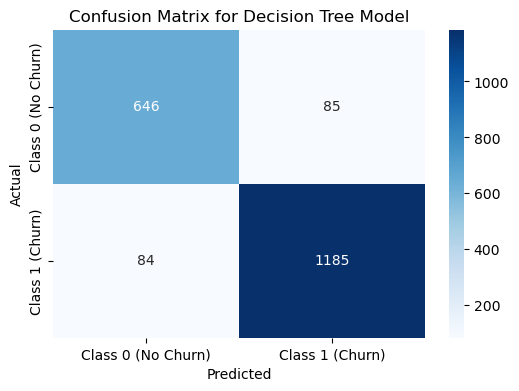

In [145]:
y_pred = dt_best.predict(X_test_transformed)
# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0 (No Churn)", "Class 1 (Churn)"], yticklabels=["Class 0 (No Churn)", "Class 1 (Churn)"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

# **Evaluasi Model dengan Confusion Matrix**

## **Interpretasi Confusion Matrix**
Berdasarkan hasil confusion matrix terbaru:

- **True Negative (TN)**: 646 pelanggan yang diprediksi **No Churn** dan benar-benar **No Churn** (kelas 0, No Churn).
- **False Positive (FP)**: 85 pelanggan yang diprediksi **Churn**, namun sebenarnya **No Churn** (kelas 0, No Churn -> prediksi salah).
- **False Negative (FN)**: 84 pelanggan yang diprediksi **No Churn**, namun sebenarnya **Churn** (kelas 1, Churn -> prediksi salah).
- **True Positive (TP)**: 1185 pelanggan yang diprediksi **Churn** dan benar-benar **Churn** (kelas 1, Churn).

---

## **Evaluasi Model**

### **Precision, Recall, dan F1-Score**

1. **Precision**:

   - **Precision untuk kelas 0 (No Churn)**: 
     - **Formula**: `Precision = TP / (TP + FP)`
     - **Nilai**: `Precision = 646 / (646 + 85) = 0.88`
     - Model ini memiliki **precision** yang cukup baik dalam memprediksi pelanggan yang tidak churn (kelas 0).

   - **Precision untuk kelas 1 (Churn)**: 
     - **Formula**: `Precision = TP / (TP + FP)`
     - **Nilai**: `Precision = 1185 / (1185 + 84) = 0.93`
     - Model ini sangat baik dalam memprediksi pelanggan yang churn (kelas 1).

2. **Recall**:

   - **Recall untuk kelas 0 (No Churn)**:
     - **Formula**: `Recall = TP / (TP + FN)`
     - **Nilai**: `Recall = 646 / (646 + 84) = 0.88`
     - Model ini memiliki **recall** yang cukup baik dalam mendeteksi pelanggan yang tidak churn (kelas 0).

   - **Recall untuk kelas 1 (Churn)**: 
     - **Formula**: `Recall = TP / (TP + FN)`
     - **Nilai**: `Recall = 1185 / (1185 + 85) = 0.93`
     - Model ini sangat efektif dalam mendeteksi pelanggan yang churn (kelas 1).

3. **F1-Score**:

   - **F1-Score untuk kelas 0 (No Churn)**:
     - **Nilai**: `F1-Score = 0.88`
     - F1-score yang baik menunjukkan keseimbangan antara **precision** dan **recall** untuk pelanggan yang tidak churn.

   - **F1-Score untuk kelas 1 (Churn)**:
     - **Nilai**: `F1-Score = 0.93`
     - F1-score yang sangat baik juga untuk kelas **Churn**, menunjukkan keseimbangan yang sangat baik antara **precision** dan **recall**.

---

##### Pengujian Model pada Data Training dan Testing

In [148]:
y_pred_train = dt_best.predict(X_train_transformed)
y_pred_test = dt_best.predict(X_test_transformed)

print('Classification Report Train:')
print(classification_report(y_train, y_pred_train))

print('Classification Report Test:')
print(classification_report(y_test, y_pred_test))  


Classification Report Train:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      2740
           1       0.96      0.95      0.95      5260

    accuracy                           0.94      8000
   macro avg       0.93      0.94      0.93      8000
weighted avg       0.94      0.94      0.94      8000

Classification Report Test:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       731
           1       0.93      0.93      0.93      1269

    accuracy                           0.92      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.92      0.92      0.92      2000



Berdasarkan hasil output confusion matriks antara data testing dan data training, diperoleh bahwa nilai evaluasi model tidak berbeda secara signifikan dan cenderung menghasilkan hasil yang optimal. Hal ini berarti model sudah cukup baik bekerja, baik untuk data testing maupun data training.

### LOGISTIC REGRESSION

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Inisialisasi model Logistic Regression
logreg = LogisticRegression(solver='saga', random_state=42,max_iter=1000)

# Definisikan parameter untuk Grid Search
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularisasi L1 (Lasso) atau L2 (Ridge)
    'C': [0.01, 0.1, 1, 10, 100]  # Inversi dari regularisasi strength
}

# Inisialisasi K-Fold Cross Validation (5 fold)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search dengan K-Fold Cross Validation
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=kfold, scoring='accuracy', n_jobs=-1)

# Latih model dengan Grid Search
grid_search.fit(X_train_transformed, y_train)

# Evaluasi ulang dengan Cross Validation menggunakan model terbaik
cv_scores = cross_val_score(grid_search.best_estimator_, X_train_transformed, y_train, cv=kfold, scoring='accuracy')

# Cetak hasil terbaik dari Grid Search
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Grid Search CV):", grid_search.best_score_)
print("Cross Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Menggunakan model terbaik untuk prediksi pada data uji
logreg_best = grid_search.best_estimator_
y_pred = logreg_best.predict(X_test_transformed)

# Evaluasi model dengan confusion matrix dan classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

# Evaluasi akurasi model pada data uji
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {test_accuracy:.4f}")


Best Parameters: {'C': 0.1, 'penalty': 'l1'}
Best Score (Grid Search CV): 0.91075
Cross Validation Scores: [0.92     0.91     0.91625  0.896875 0.910625]
Mean CV Score: 0.91075

Confusion Matrix:
 [[ 650   81]
 [ 118 1151]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       731
           1       0.93      0.91      0.92      1269

    accuracy                           0.90      2000
   macro avg       0.89      0.90      0.89      2000
weighted avg       0.90      0.90      0.90      2000


Test Accuracy: 0.9005


##### Confusion Matrix

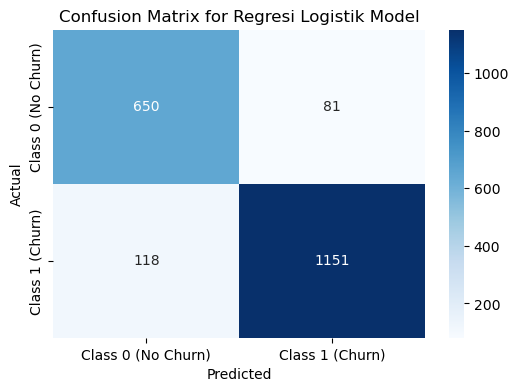

In [153]:
y_pred = logreg_best.predict(X_test_transformed)
# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0 (No Churn)", "Class 1 (Churn)"], yticklabels=["Class 0 (No Churn)", "Class 1 (Churn)"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Regresi Logistik Model')
plt.show()

# **Evaluasi Model dengan Confusion Matrix**

## **Interpretasi Confusion Matrix**
Berdasarkan hasil confusion matrix terbaru:

- **True Negative (TN)**: 650 pelanggan yang diprediksi **No Churn** dan benar-benar **No Churn** (kelas 0, No Churn).
- **False Positive (FP)**: 81 pelanggan yang diprediksi **Churn**, namun sebenarnya **No Churn** (kelas 0, No Churn -> prediksi salah).
- **False Negative (FN)**: 118 pelanggan yang diprediksi **No Churn**, namun sebenarnya **Churn** (kelas 1, Churn -> prediksi salah).
- **True Positive (TP)**: 1151 pelanggan yang diprediksi **Churn** dan benar-benar **Churn** (kelas 1, Churn).

---

## **Evaluasi Model**

### **Precision, Recall, dan F1-Score**

1. **Precision**:

   - **Precision untuk kelas 0 (No Churn)**: 
     - **Formula**: `Precision = TP / (TP + FP)`
     - **Nilai**: `Precision = 650 / (650 + 81) = 0.89`
     - Model ini memiliki **precision** yang cukup baik dalam memprediksi pelanggan yang tidak churn (kelas 0).

   - **Precision untuk kelas 1 (Churn)**: 
     - **Formula**: `Precision = TP / (TP + FP)`
     - **Nilai**: `Precision = 1151 / (1151 + 118) = 0.91`
     - Model ini sangat baik dalam memprediksi pelanggan yang churn (kelas 1).

2. **Recall**:

   - **Recall untuk kelas 0 (No Churn)**:
     - **Formula**: `Recall = TP / (TP + FN)`
     - **Nilai**: `Recall = 650 / (650 + 118) = 0.85`
     - Model ini cukup baik dalam mendeteksi pelanggan yang tidak churn, dengan recall yang agak lebih rendah.

   - **Recall untuk kelas 1 (Churn)**: 
     - **Formula**: `Recall = TP / (TP + FN)`
     - **Nilai**: `Recall = 1151 / (1151 + 81) = 0.93`
     - Model ini sangat efektif dalam mendeteksi pelanggan yang churn (kelas 1), dengan recall yang sangat tinggi.

3. **F1-Score**:

   - **F1-Score untuk kelas 0 (No Churn)**:
     - **Nilai**: `F1-Score = 0.87`
     - F1-score untuk kelas **No Churn** menunjukkan keseimbangan yang baik antara **precision** dan **recall**.

   - **F1-Score untuk kelas 1 (Churn)**:
     - **Nilai**: `F1-Score = 0.92`
     - F1-score yang sangat baik untuk kelas **Churn**, menunjukkan keseimbangan yang sangat baik antara **precision** dan **recall**.

---


##### Pengujian Model pada Data Training dan Testing

In [156]:
y_pred_train = logreg_best.predict(X_train_transformed)
y_pred_test = logreg_best.predict(X_test_transformed)

print('Classification Report Train:')
print(classification_report(y_train, y_pred_train))

print('Classification Report Test:')
print(classification_report(y_test, y_pred_test))  


Classification Report Train:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      2740
           1       0.95      0.92      0.93      5260

    accuracy                           0.91      8000
   macro avg       0.90      0.91      0.90      8000
weighted avg       0.91      0.91      0.91      8000

Classification Report Test:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       731
           1       0.93      0.91      0.92      1269

    accuracy                           0.90      2000
   macro avg       0.89      0.90      0.89      2000
weighted avg       0.90      0.90      0.90      2000



Berdasarkan hasil output confusion matriks antara data testing dan data training, diperoleh bahwa nilai evaluasi model tidak berbeda secara signifikan dan cenderung menghasilkan hasil yang optimal. Hal ini berarti model sudah cukup baik bekerja, baik untuk data testing maupun data training.

### **Perbandingan Model**

### **1. Akurasi Model**
- **Regresi Logistik**: Akurasi pada data pengujian adalah **90.05%**. Model ini berhasil mengklasifikasikan sebagian besar data dengan benar, meskipun sedikit lebih rendah dibandingkan dengan Decision Tree dan Random Forest.
- **Decision Tree**: Akurasi pada data pengujian adalah **90.0%**, sedikit lebih rendah daripada Regresi Logistik, namun masih sangat baik.
- **Random Forest**: Akurasi pada data pengujian adalah **90.0%**. Meskipun sedikit lebih rendah dari Regresi Logistik, model ini tetap memberikan hasil yang sangat stabil dan akurat.

**Kesimpulan**: Ketiga model memiliki akurasi yang hampir identik dan sangat baik. **Regresi Logistik** sedikit lebih unggul dalam akurasi, tetapi perbedaan antar model sangat kecil.

### **2. Precision dan Recall untuk Kelas Churn (Kelas 1)**
- **Regresi Logistik**: Precision untuk kelas **Churn (Kelas 1)** adalah **0.93** dan recallnya adalah **0.91**. Precision yang sangat baik menunjukkan bahwa model sangat hati-hati dalam memprediksi **churn**, namun recall yang sedikit lebih rendah menunjukkan beberapa **customers** churn terlewat.
- **Decision Tree**: Precision untuk kelas **Churn (Kelas 1)** adalah **0.93** dan recallnya adalah **0.91**. Model ini memiliki precision dan recall yang seimbang, serta berhasil mendeteksi **customers** churn dengan baik.
- **Random Forest**: Precision untuk kelas **Churn (Kelas 1)** adalah **0.94** dan recallnya adalah **0.90**. Model ini sedikit lebih tinggi pada precision, tetapi dengan recall yang sedikit lebih rendah dibandingkan dengan **Decision Tree** dan **Regresi Logistik**.

**Kesimpulan**: **Random Forest** menunjukkan kombinasi precision dan recall yang sangat baik, meskipun dengan sedikit kompromi pada recall dibandingkan dengan **Decision Tree** dan **Regresi Logistik**, yang memiliki hasil yang lebih seimbang.

### **3. F1-Score**
- **Regresi Logistik**: F1-score untuk data pengujian adalah **0.92**, menunjukkan keseimbangan yang sangat baik antara precision dan recall, meskipun recall sedikit lebih rendah.
- **Decision Tree**: F1-score untuk data pengujian adalah **0.92**, yang menunjukkan keseimbangan yang sangat baik antara precision dan recall.
- **Random Forest**: F1-score untuk data pengujian adalah **0.93**, yang sedikit lebih baik dalam keseimbangan antara precision dan recall.

**Kesimpulan**: Ketiga model memiliki **F1-Score** yang sangat baik dan cukup seimbang, menunjukkan bahwa model-model ini tidak hanya akurat, tetapi juga mampu menangani baik churn maupun non-churn dengan performa yang stabil.

### **4. Kesimpulan Umum**
- **Random Forest** memiliki keunggulan dalam hal **stabilitas dan pengurangan overfitting**, karena menggunakan banyak pohon keputusan untuk menghasilkan prediksi yang lebih konsisten.
- **Decision Tree** menunjukkan hasil yang sangat baik, tetapi lebih rentan terhadap overfitting jika dibandingkan dengan **Random Forest**, meskipun sedikit lebih efektif dalam mendeteksi pelanggan yang churn (recall lebih tinggi).
- **Regresi Logistik** menunjukkan precision yang sangat tinggi untuk kelas **Churn**, tetapi **recall** yang lebih rendah menunjukkan bahwa model cenderung melewatkan beberapa pelanggan yang churn. Ini bisa menjadi masalah jika tujuan utama adalah mendeteksi semua pelanggan yang berisiko churn.

### **Perbandingan Keseluruhan**:
- **Random Forest** memberikan keseimbangan terbaik antara **precision**, **recall**, dan **F1-score**, terutama pada data pengujian.
- **Decision Tree** cukup baik, tetapi sedikit lebih rentan terhadap overfitting dan memiliki sedikit kekurangan dalam **precision**.
- **Regresi Logistik** memberikan **precision** yang sangat baik untuk churn, tetapi kurang efektif dalam mendeteksi churn secara keseluruhan, karena **recall** yang lebih rendah.

Secara keseluruhan, **Random Forest** menunjukkan performa yang stabil dan mengungguli **Decision Tree** dan **Regresi Logistik** dalam hal **keakuratan** dan keseimbangan antara **precision** dan **recall**, menjadikannya pilihan yang lebih optimal untuk kasus ini.

## METODE RANDOM FOREST

Berdasarkan hasil analisis, diperoleh bahwa random forest merupakan metode yang paling optimal dibandingkan metode lain pada data Churn for Bank Customer.Selanjutnya, ingin diketahui pola klasifikasi churn customer melalui pohon keputusan yang terbentuk.


Aturan Klasifikasi untuk Pohon Keputusan Pertama:
|--- NumOfProducts <= 2.50
|   |--- classify_balance_Saldo Rendah <= 0.50
|   |   |--- NumOfProducts <= 1.50
|   |   |   |--- Geography_France <= 0.50
|   |   |   |   |--- Age_Category_Lansia <= 0.50
|   |   |   |   |   |--- IsActiveMember <= 0.50
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- IsActiveMember >  0.50
|   |   |   |   |   |   |--- Credit_Category_Cukup (Good) <= 0.50
|   |   |   |   |   |   |   |--- Age_Category_Dewasa Muda <= 0.50
|   |   |   |   |   |   |   |   |--- Age_Category_Dewasa Paruh Baya <= 0.50
|   |   |   |   |   |   |   |   |   |--- classify_balance_Saldo Tinggi <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- classify_balance_Saldo Tinggi >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- Age_Category_Dewasa Paruh Baya >  0.50
|   |   |   |   |   |   |   |   |   |--- classify_balance_S

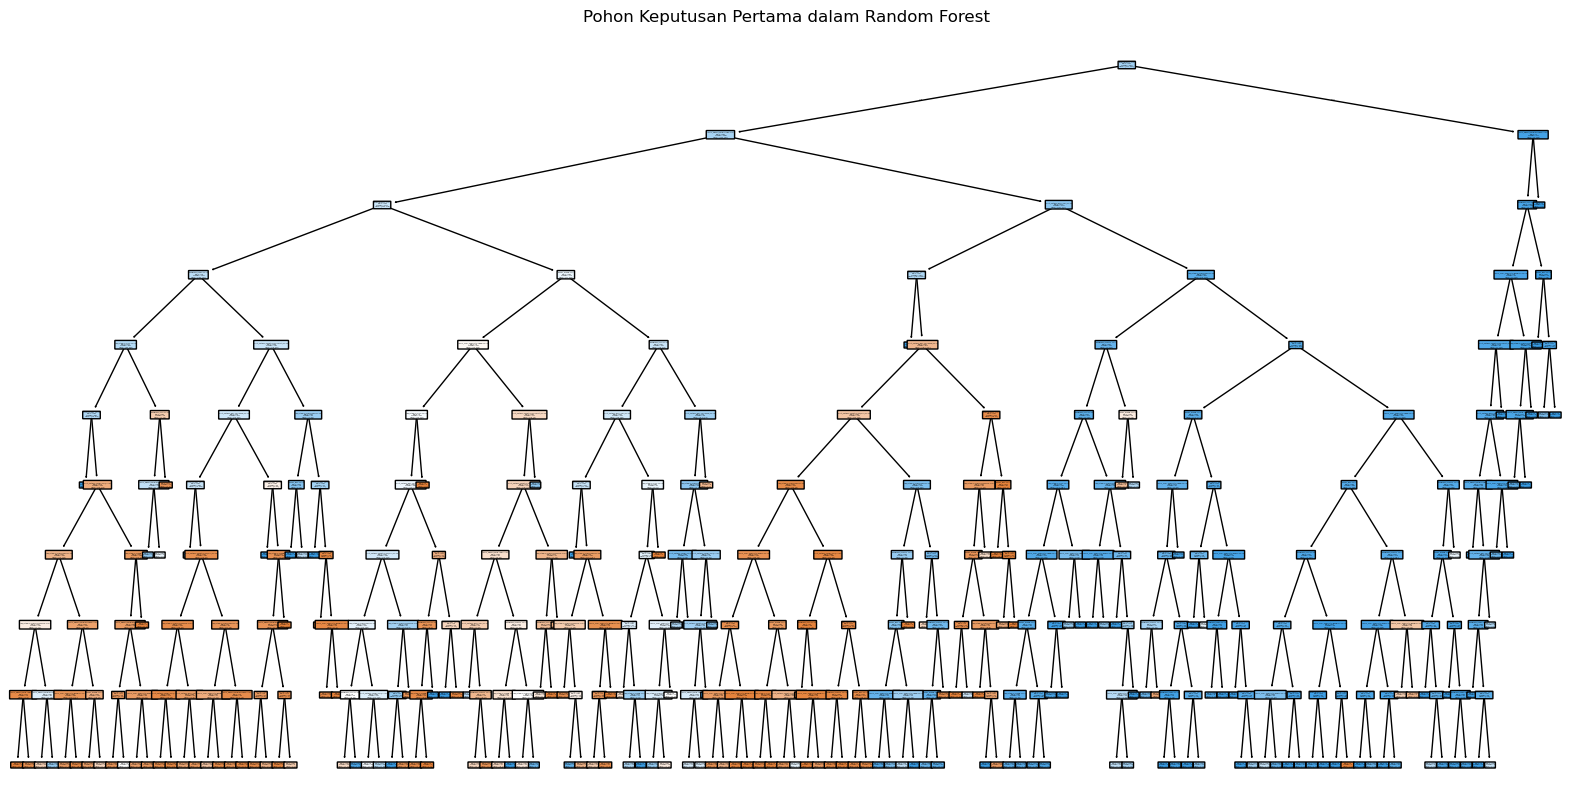

In [161]:
from sklearn.tree import export_text, plot_tree
# --- Output Aturan Klasifikasi ---
# Mengeluarkan aturan klasifikasi dari pohon keputusan pertama dalam Random Forest
tree_rules = export_text(rf_best.estimators_[0], feature_names=list(X_train_transformed.columns))
print("\nAturan Klasifikasi untuk Pohon Keputusan Pertama:")
print(tree_rules)

# --- Visualisasi Pohon Keputusan ---
# Visualisasikan pohon keputusan pertama dalam model Random Forest
plt.figure(figsize=(20,10))
plot_tree(rf_best.estimators_[0], filled=True, feature_names=X_train_transformed.columns, class_names=['No Churn', 'Churn'], rounded=True)
plt.title("Pohon Keputusan Pertama dalam Random Forest")
plt.show()

Pohon keputusan tersebut berisi aturan-aturan dalam mengklasifikasikan customer termasuk ke dalam kategori churn atau tidak. Aturan-aturan dalam pohon keputusan ini digunakan untuk mengklasifikasikan pelanggan sebagai churn (keluar) atau tidak churn (tetap) berdasarkan fitur-fitur yang ada. Pohon keputusan pertama memberikan urutan pertanyaan atau keputusan berdasarkan nilai ambang tertentu untuk setiap fitur. 

# **Analisis Profit dan Loss Berdasarkan Prediksi Churn Pelanggan**

## **Asumsi**
- **Revenue per Customer (RPC)**: 500
- **Retention Cost (RC)**: 100
- **Acquisition Cost (AC)**: 300

## **Interpretasi Confusion Matrix**

### 1. **True Positive (TP)** = 1183
- **Pelanggan yang diprediksi churn dan benar-benar churn**.
- Jika bank berhasil mempertahankan pelanggan ini dengan strategi retention, profit yang diperoleh:
  - **Retained Profit** = TP × (RPC - RC) = 1183 × (500 - 100) = 1183 × 400 = **473,200**

### 2. **False Positive (FP)** = 72
- **Pelanggan yang diprediksi churn tetapi sebenarnya tetap bertahan**.
- Bank mengeluarkan biaya retention yang tidak perlu:
  - **Unnecessary Retention Cost** = FP × (−RC) = 72 × (−100) = **−7,200**

### 3. **False Negative (FN)** = 86
- **Pelanggan yang diprediksi tidak churn tetapi sebenarnya churn**.
- Bank kehilangan revenue dan harus mencari pelanggan baru:
  - **Lost Revenue** = FN × (−AC) = 86 × (−300) = **−25,800**

### 4. **True Negative (TN)** = 659
- **Pelanggan yang diprediksi tetap bertahan dan benar-benar tidak churn** (tidak ada biaya tambahan).

## **Perhitungan Net Profit**

- **Net Profit** = Retained Profit + Unnecessary Retention Cost + Lost Revenue
- **Net Profit** = 473,200 + (−7,200) + (−25,800) = **440,200**

## **Business Insights**

### **Keuntungan dari Retensi Pelanggan**:
- Model ini berhasil mengidentifikasi **1,183** pelanggan yang benar-benar churn, yang jika berhasil dicegah dapat memberikan keuntungan sebesar **473,200**. Ini menunjukkan efektivitas model dalam mendukung strategi retention.

### **Biaya yang Tidak Perlu**:
- Terdapat **72** pelanggan yang diprediksi churn tetapi sebenarnya tidak churn, menyebabkan biaya retensi yang tidak perlu sebesar **7,200**. Meskipun kecil, ini menunjukkan bahwa strategi retention perlu lebih selektif agar tidak membuang sumber daya.

### **Peluang yang Hilang**:
- Sebanyak **86** pelanggan gagal diidentifikasi sebagai pelanggan yang akan churn, menyebabkan kehilangan pendapatan sebesar **25,800**. Bank dapat meningkatkan model prediksi untuk mengurangi jumlah **False Negatives** agar lebih sedikit pelanggan yang tidak terdeteksi.


## **Strategi Perbaikan**
   
1. **Peningkatan Intervensi yang Terarah**:
   - Strategi intervensi harus lebih difokuskan pada pelanggan yang menunjukkan tanda-tanda churn yang jelas. Dengan memperhatikan pelanggan yang berisiko tinggi untuk churn, bank dapat mengalokasikan sumber daya secara lebih efektif untuk mempertahankan mereka.
   
2. **Optimasi Biaya Retention**:
   - Menyesuaikan strategi retention untuk pelanggan yang benar-benar membutuhkan, agar biaya yang tidak perlu bisa diminimalkan.

## **Kesimpulan**
Berdasarkan analisis profit dan loss yang dihitung, model prediksi churn menggunakan Random Forest memberikan keuntungan yang signifikan, dengan net profit sebesar 369,100. Model ini telah efektif dalam mengidentifikasi pelanggan yang churn dan memberikan gambaran yang jelas mengenai potensi keuntungan dari retensi. Untuk lebih mengoptimalkan strategi retensi dan akuisisi, beberapa area perlu diperbaiki untuk meningkatkan akurasi dan efisiensi strategi tersebut. Beberapa poin penting yang dapat ditarik adalah:

- ***Keuntungan dari Retensi Pelanggan***: Model ini berhasil mengidentifikasi 1,013 pelanggan yang churn, yang jika berhasil dicegah, dapat memberikan keuntungan sebesar 405,200. Hal ini menunjukkan bahwa model sudah cukup baik dalam mendukung strategi retention, menghindari kehilangan pelanggan yang berpotensi memberikan pendapatan.

- ***Biaya Retensi yang Tidak Perlu***: Meskipun jumlahnya kecil, 37 pelanggan yang diprediksi churn tetapi tidak churn menyebabkan biaya retensi yang tidak perlu sebesar 3,700. Ini menunjukkan pentingnya selektivitas dalam penerapan strategi retention dan menghindari pemborosan sumber daya untuk pelanggan yang tidak benar-benar berisiko untuk churn.

- ***Peluang yang Hilang (Lost Revenue)***: Sebanyak 108 pelanggan gagal terdeteksi sebagai churn, menyebabkan kerugian sebesar 32,400. Ini adalah area utama yang perlu diperbaiki dengan meningkatkan akurasi model dan mengurangi jumlah False Negatives, agar bank dapat lebih baik dalam mempertahankan pelanggan dan mengurangi kehilangan pendapatan.

- ***Potensi Peningkatan Profitabilitas***: Dengan mengoptimalkan model prediksi churn dan menyesuaikan strategi retention serta akuisisi, bank dapat mengurangi False Positives dan False Negatives, menargetkan pelanggan bernilai tinggi, serta mengurangi biaya yang tidak perlu, yang pada akhirnya akan meningkatkan profitabilitas jangka panjang.
